In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier
import shap
from sklearn.metrics import precision_recall_curve, f1_score, auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn import tree, metrics
import time
from sklearn.model_selection import cross_val_score
plt.style.use('ggplot')
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import plotly.express as px
print('***Libraries are imported***')

***Libraries are imported***


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/Thesis/Dataset/AU-PEMal-2025-V2.csv')

In [5]:
# Count total samples per Category
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Total Samples"]
print(category_counts)

     Category  Total Samples
0      Benign          10839
1  Ransomware           4761
2         RAT           2639
3     Stealer           2018
4      Trojan           1446


In [6]:
# Count total samples per Family
category_counts = df["Family"].value_counts().reset_index()
category_counts.columns = ["Family", "Total Samples"]
print(category_counts)

        Family  Total Samples
0       Benign          10839
1       Phobos            550
2        Snake            527
3     NanoCore            520
4      Raccoon            518
5       Remcos            512
6        njRat            506
7       Dharma            505
8        Shade            504
9      RedLine            500
10    WannaCry            496
11    Formbook            473
12        Ryuk            449
13       Gh0st            446
14    Guloader            444
15     LockBit            438
16    Gandcrab            382
17       REvil            347
18    Glupteba            346
19      Emotet            345
20  Agenttesla            337
21    DarkSide            335
22      Cerber            332
23        Qbot            320
24      Ursnif            309
25        Maze            290
26      Ragnar            133


In [ ]:
df.shape

(21703, 39)

/tmp/ipython-input-771126249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set2")


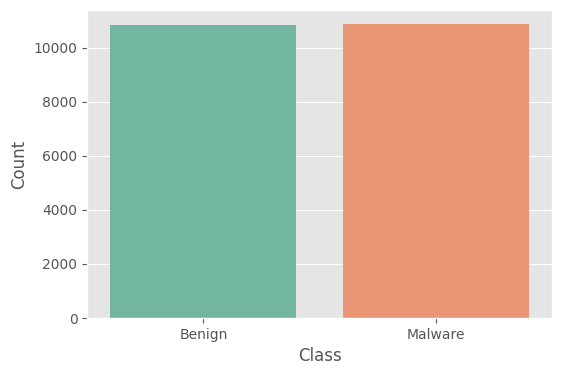

In [ ]:
# -------------------------
# 1. Bar chart for Class
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, palette="Set2")
#plt.title("Total Samples per Class", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/class_distribution.pdf")   # <-- save as PDF
plt.show()

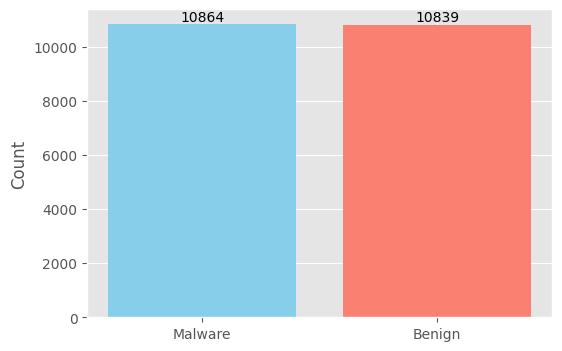

In [ ]:
# 1. Class Distribution
class_counts = df["Class"].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(class_counts.index, class_counts.values, color=["skyblue", "salmon"])
#plt.title("Samples per Class")
plt.ylabel("Count")

# Add counts above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom')
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/class_distribution-detail.pdf")   # <-- save as PDF
plt.show()

/tmp/ipython-input-2852677517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=df, palette="Set3", order=df['Category'].value_counts().index)


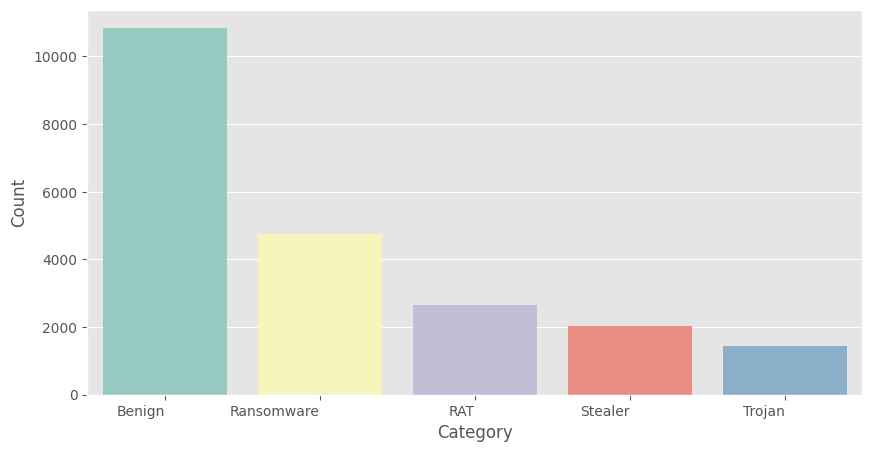

In [ ]:
# -------------------------
# 2. Bar chart for Category
# -------------------------
plt.figure(figsize=(10,5))
sns.countplot(x="Category", data=df, palette="Set3", order=df['Category'].value_counts().index)
#plt.title("Total Samples per Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0, ha="right")
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/category_distribution.pdf")   # <-- save as PDF
plt.show()

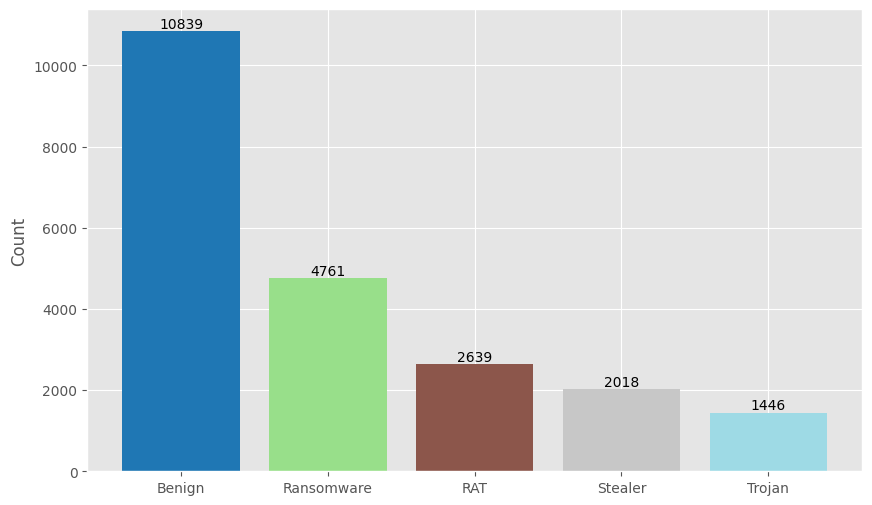

In [ ]:
import matplotlib.cm as cm
import numpy as np

# 2. Category Distribution (with different colors)
category_counts = df["Category"].value_counts()

plt.figure(figsize=(10,6))

# Use a colormap with enough distinct colors
colors = cm.tab20(np.linspace(0, 1, len(category_counts)))

bars = plt.bar(category_counts.index, category_counts.values, color=colors)
#plt.title("Samples per Category")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add counts above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/category_distribution-detail.pdf")   # <-- save as PDF
plt.show()


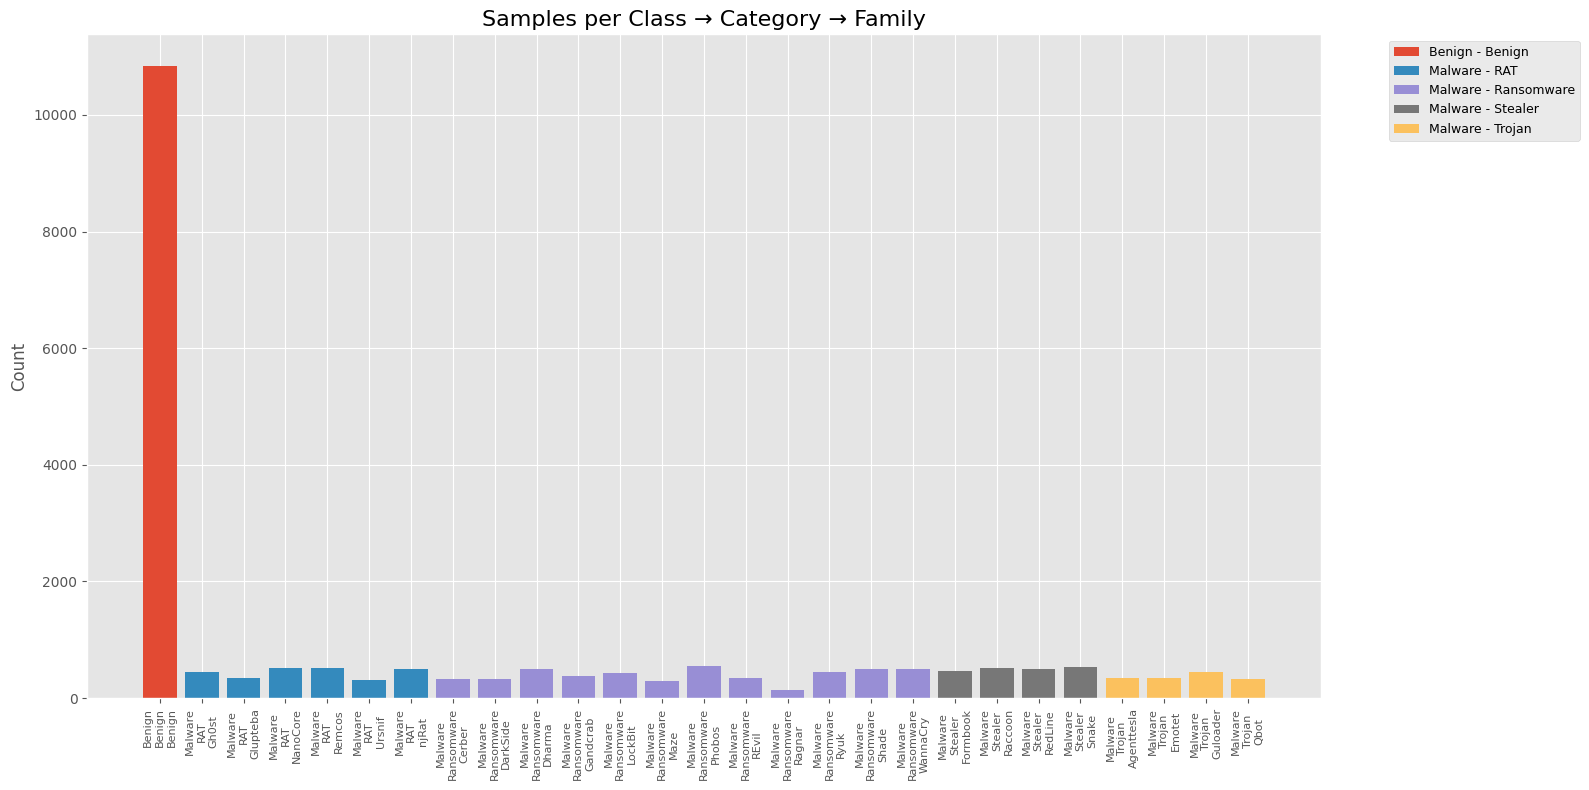

In [ ]:
# -------------------------
# 3. Hierarchical Bar Chart (Class → Category → Family)
# -------------------------

# Count occurrences
hierarchy_counts = df.groupby(["Class", "Category", "Family"]).size().reset_index(name="Count")

# Create multi-level bar chart
plt.figure(figsize=(16,8))

# Loop through each class
for cls in hierarchy_counts["Class"].unique():
    subset = hierarchy_counts[hierarchy_counts["Class"] == cls]
    categories = subset["Category"].unique()

    for cat in categories:
        cat_subset = subset[subset["Category"] == cat]
        plt.bar(
            x=[f"{cls}\n{cat}\n{fam}" for fam in cat_subset["Family"]],
            height=cat_subset["Count"],
            label=f"{cls} - {cat}"
        )

plt.title("Samples per Class → Category → Family", fontsize=16)
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

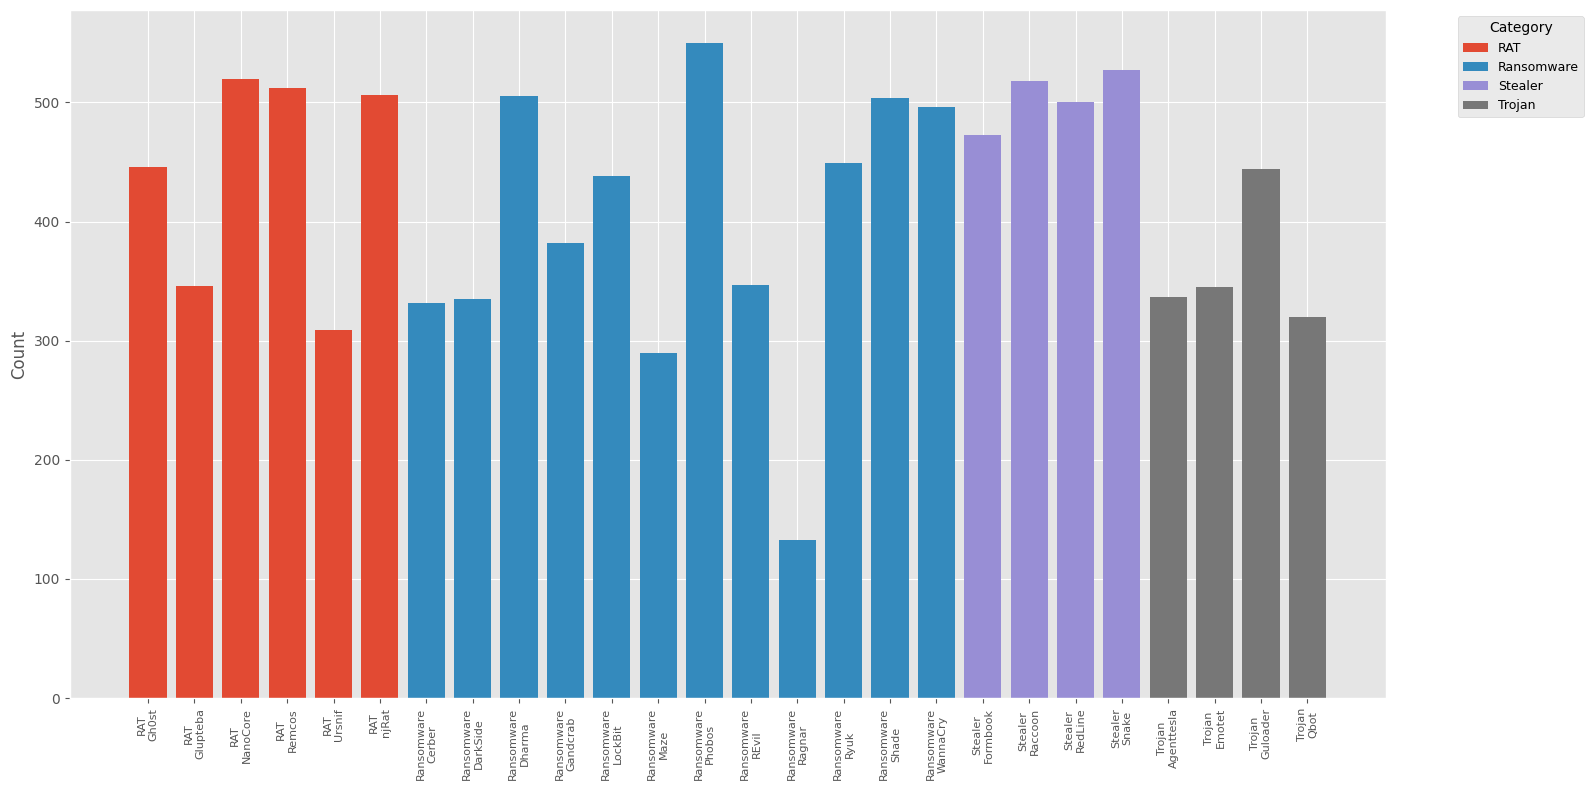

In [ ]:
# -------------------------
# 3. Hierarchical Bar Chart (Only Malware → Category → Family)
# -------------------------

# Filter out Benign rows
malware_df = df[df["Class"] == "Malware"]

# Count occurrences
hierarchy_counts = malware_df.groupby(["Category", "Family"]).size().reset_index(name="Count")

plt.figure(figsize=(16,8))

# Loop through each category
for cat in hierarchy_counts["Category"].unique():
    cat_subset = hierarchy_counts[hierarchy_counts["Category"] == cat]
    plt.bar(
        x=[f"{cat}\n{fam}" for fam in cat_subset["Family"]],
        height=cat_subset["Count"],
        label=cat
    )

#plt.title("Malware Samples per Category → Family", fontsize=16)
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title="Category")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/family_distribution.pdf")   # <-- save as PDF
plt.show()


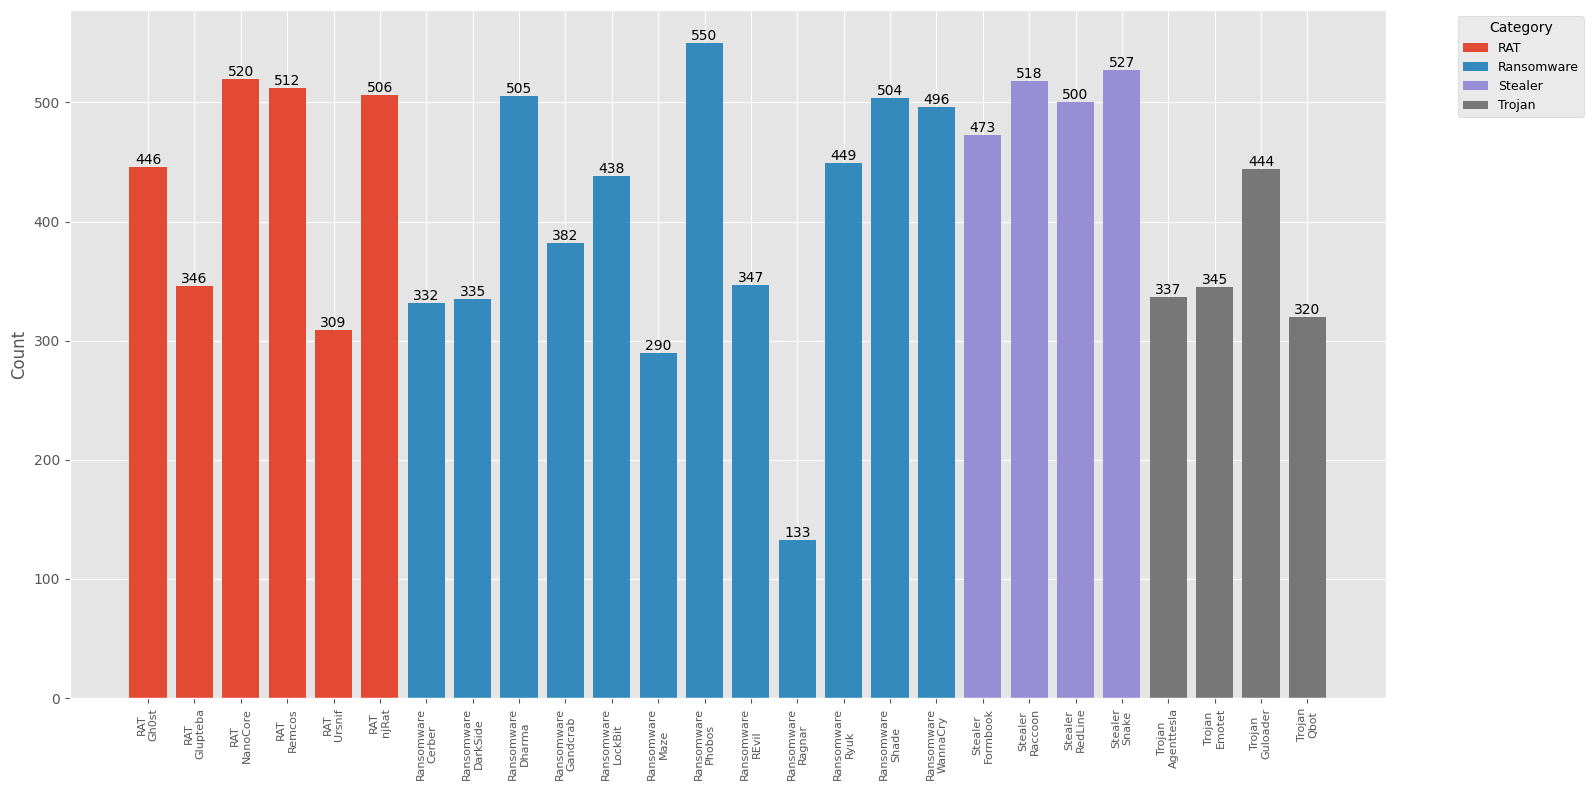

In [ ]:
# 3. Hierarchical Bar Chart (Malware only)
malware_df = df[df["Class"] == "Malware"]
hierarchy_counts = malware_df.groupby(["Category", "Family"]).size().reset_index(name="Count")

plt.figure(figsize=(16,8))

bars = []
for cat in hierarchy_counts["Category"].unique():
    cat_subset = hierarchy_counts[hierarchy_counts["Category"] == cat]
    b = plt.bar(
        x=[f"{cat}\n{fam}" for fam in cat_subset["Family"]],
        height=cat_subset["Count"],
        label=cat
    )
    bars.extend(b)

#plt.title("Malware Samples per Category → Family", fontsize=16)
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title="Category")

# Add counts above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/family_distribution-detail.pdf")   # <-- save as PDF
plt.show()


In [ ]:
pip install squarify

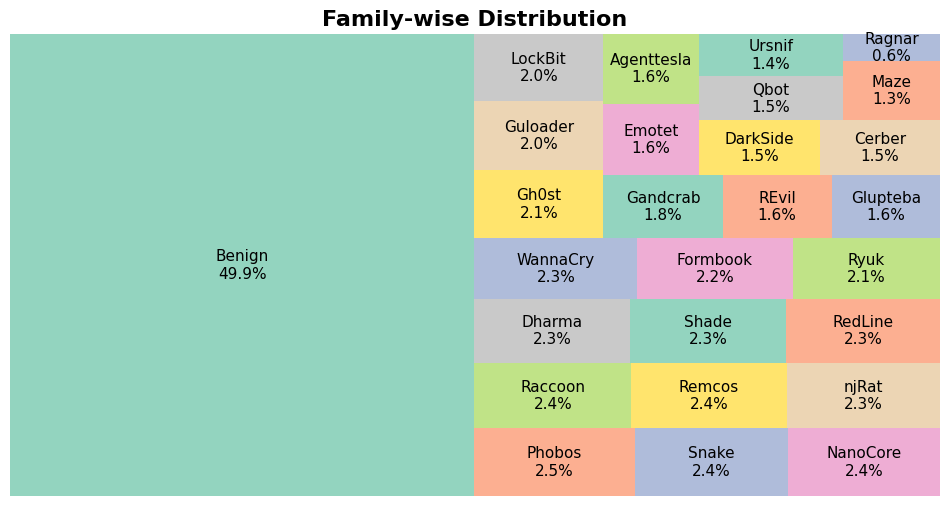

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
df = pd.DataFrame(df)
# Count the occurrences of each category
category_counts = df['Family'].value_counts()

# Calculate percentages
total = category_counts.sum()
percentages = (category_counts / total) * 100

# Colors for the treemap
colors = plt.cm.Set2.colors  # Using a colormap for nicer colors

# Plotting a treemap with percentage labels
plt.figure(figsize=(12, 6))
squarify.plot(sizes=category_counts.values, label=[f"{label}\n{percent:.1f}%" for label, percent in zip(category_counts.index, percentages)],
              alpha=0.7, color=colors, text_kwargs={'fontsize': 11})
plt.axis('off')
plt.title('Family-wise Distribution', fontsize=16, fontweight='bold')
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/merged_distribution.pdf")   # <-- save as PDF
plt.show()

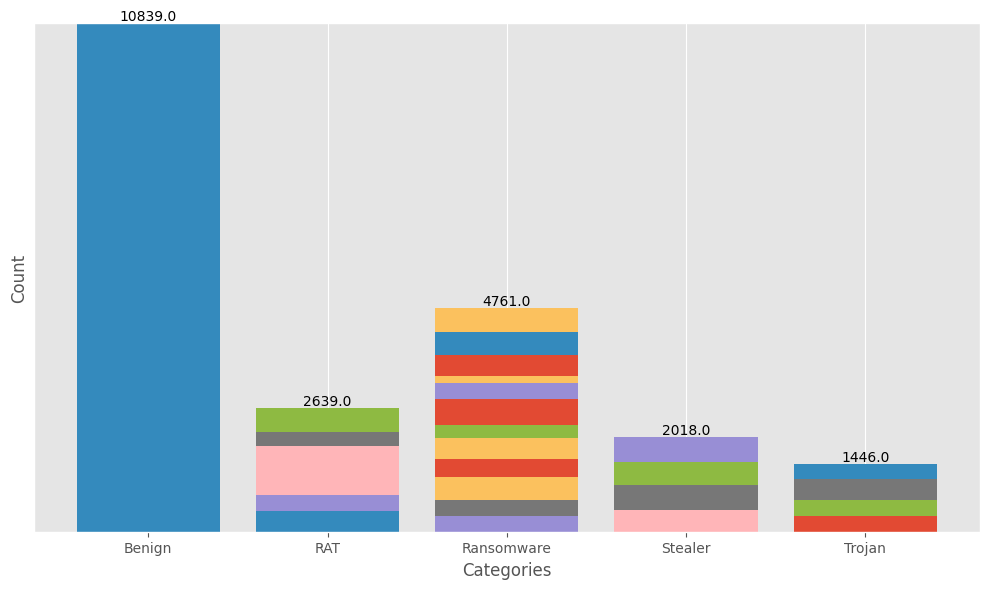

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(df)

# Group by Category and Family, count occurrences
category_family_counts = df.groupby(['Category', 'Family']).size().unstack().fillna(0)

# Calculate total count for each category
category_totals = category_family_counts.sum(axis=1)

# Plotting a nested bar chart with total counts displayed
plt.figure(figsize=(10, 6))
bottom = None
for col in category_family_counts.columns:
    plt.bar(category_family_counts.index, category_family_counts[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = category_family_counts[col].values
    else:
        bottom += category_family_counts[col].values

# Plot total count text on top of bars
for i, total in enumerate(category_totals):
    plt.text(i, total, str(total), ha='center', va='bottom')

#plt.title('Category-wise Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(range(len(category_family_counts.index)), category_family_counts.index)
plt.yticks([])  # Remove y-axis ticks
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ML/Thesis/Dataset/Graphs/merged_distribution-bar.pdf")   # <-- save as PDF
plt.show()
